# How to Form a Good Cointegrating (and Mean-Reverting) Pair of Stocks

In [47]:
import numpy as np

In [48]:
import pandas as pd

In [49]:
import matplotlib.pyplot as plt

In [50]:
from statsmodels.tsa.stattools import coint

In [51]:
from statsmodels.api import OLS

In [52]:
from scipy.stats import pearsonr

In [53]:
df1=pd.read_excel('KO.xls')

In [54]:
df2=pd.read_excel('PEP.xls')

In [55]:
df=pd.merge(df1, df2, on='Date', suffixes=('_KO', '_PEP'))

In [56]:
df.set_index('Date', inplace=True)

In [57]:
df.sort_index(inplace=True)

## Run cointegration (Engle-Granger) test

In [58]:
coint_t, pvalue, crit_value=coint(df['Adj Close_KO'], df['Adj Close_PEP'])

In [59]:
(coint_t, pvalue, crit_value) # abs(t-stat) < critical value at 90%. pvalue says probability of null hypothesis (of no cointegration) is 73%

(-1.5815517041517158,
 0.7286134576473535,
 array([-3.89783854, -3.33691006, -3.04499143]))

## Determine hedge ratio

In [60]:
model=OLS(df['Adj Close_KO'], df['Adj Close_PEP'])

In [61]:
results=model.fit()

In [62]:
hedgeRatio=results.params

In [63]:
hedgeRatio

Adj Close_PEP    1.011409
dtype: float64

##  spread = KO - hedgeRatio*PEP

In [64]:
spread=df['Adj Close_KO']-hedgeRatio[0]*df['Adj Close_PEP']

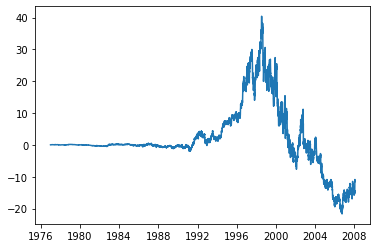

In [65]:
plt.plot(spread) # Figure 7.2

## Correlation test

In [66]:
dailyret=df.loc[:, ('Adj Close_KO', 'Adj Close_PEP')].pct_change()

In [67]:
dailyret.corr()

,Adj Close_KO,Adj Close_PEP
Adj Close_KO,1.000000,0.484924
Adj Close_PEP,0.484924,1.000000


In [68]:
dailyret_clean=dailyret.dropna()

In [69]:
pearsonr(dailyret_clean.iloc[:,0], dailyret_clean.iloc[:,1]) # first output is correlation coefficient, second output is pvalue.

(0.48492394393705673, 0.0)